# PROCESAMIENTO DIGITAL DE SEÑALES DE AUDIO

## Filtros en tiempo discreto


En este notebook se mostrará el diseño de diferentes filtros lineales e invariantes en el tiempo y su análisis a partir de la respuesta en frecuencia y de la transformada z.

### Cómo correr el notebook
Se puede bajar y correr el notebook de forma local en una computadora.

O también se puede correr en Google Colab usando el siguiente enlace. 

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/notebooks/audioDSP-SLITS-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal


### Respuesta en frecuencia


• La respuesta en frecuencia es la Transformada de Fourier de Tiempo Discreto de la respuesta al impulso,

$$h[n] ←→ H(e^{j\theta})$$
• Las transformadas de Fourier de la entrada y la salida $X(e^{j\theta})$ y $Y (e^{j\theta})$ respectivamente del sistema se relacionan por $Y (e^{j\theta}) = H(e^{j\theta}) X(e^{j\theta})$


En el caso general, es una función que toma valores complejos, es periódica de período 2π.

La representación en notación polar (módulo y fase por separado) muestra de forma clara las propiedades
del sistema.

A continuación se muestra el módulo y fase del filtro Butterworth pasabajos. Al ser un IIR no es de fase lineal y por lo tanto distorsiona la fase.

Por otro lado un filtro FIR pasabajos implementado simplemente mediante una ventana de Hann del largo adecuado, se comporta de manera similar en cuanto a la respuesta en módulo, pero la fase es lineal (en la gráfica se observa que queda con una pendiente constante a trozos).


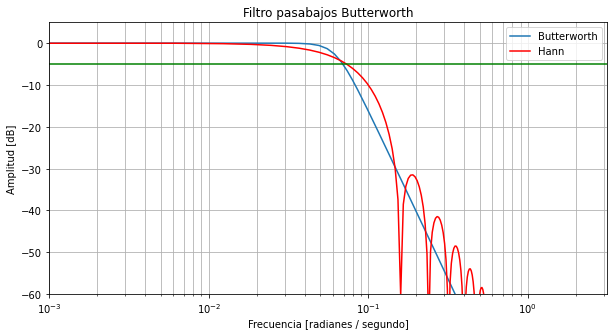

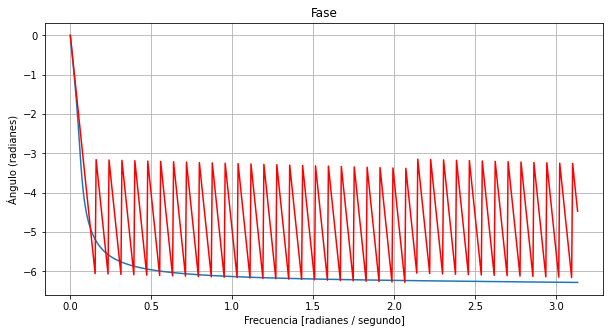

In [5]:
# Pasabajos IIR, Butterworth
b, a = signal.butter(4, 0.25, 'low')

# Pasabajos FIR implementado con una ventana de Hann
bFIR = np.hanning(80)
bFIR =  bFIR/np.sum(bFIR)
aFIR = 1
wFIR, hFIR = signal.freqz(bFIR, aFIR)


sos = signal.butter(4, 100, 'lowpass', fs=10000, output='sos')
b, a = signal.butter(4, 100, 'lowpass', fs=10000)

w, h = signal.freqz(b, a)

plt.rcParams['figure.figsize'] = [10, 5]

plt.semilogx(w, 20 * np.log10(abs(h)), label='Butterworth')
plt.semilogx(wFIR, 20 * np.log10(abs(hFIR)),'r', label='Hann')
plt.title('Filtro pasabajos Butterworth')
plt.xlabel('Frecuencia [radianes / segundo]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.axis([0.001,np.pi,-60,5])
plt.legend()
plt.show()


angles = np.unwrap(np.angle(h))
plt.plot(w, angles)
plt.plot(wFIR, np.unwrap(np.angle(hFIR)), 'r')

plt.ylabel('Ángulo (radianes)')
plt.xlabel('Frecuencia [radianes / segundo]')
plt.title('Fase')
plt.grid()
plt.axis('tight')
plt.show()

La fase lineal o lineal generalizada conserva mejor las caracterticas de una señal en el dominio del tiempo. Por ejemplo si se filtra una onda cuadrada, que tiene componentes en distintas frecuencias en los tiempos correspondientes a las transiciones.

Si se filtra esta señal con un pasabajos de fase lineal, todas las componentes se retardan la misma cantidad de tiempo y por lo tanto la transición se suaviza pero no aparecen componentes frecuenciales que aparentan estar en otros tiempos.

Si se filtra esta señal con un pasabajos de fase no lineal, las componentes se retardan distinta cantidad de tiempo y por lo tanto pueden aparecer componentes frecuenciales que aparentan estar en otros tiempos.

Esto se muestra en el siguiente ejemplo sobre el que se plantea el siguiente ejercicio:

### Ejercicio sobre el ejemplo:
- Estimar a partir de la fase evaluada la cantidad de muestras que es retardada la señal con el filtrado con la ventana de Hann
- Graficar alineadas la entrada y salida retardando o adelantado la cantidad de muestras estimada


/Users/julianoflaherty/Documents/Facultad/AudioDSP/.venv/lib/python3.8/site-packages/scipy/signal/_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


Text(0.5, 0, 'Tiempo [segundos]')

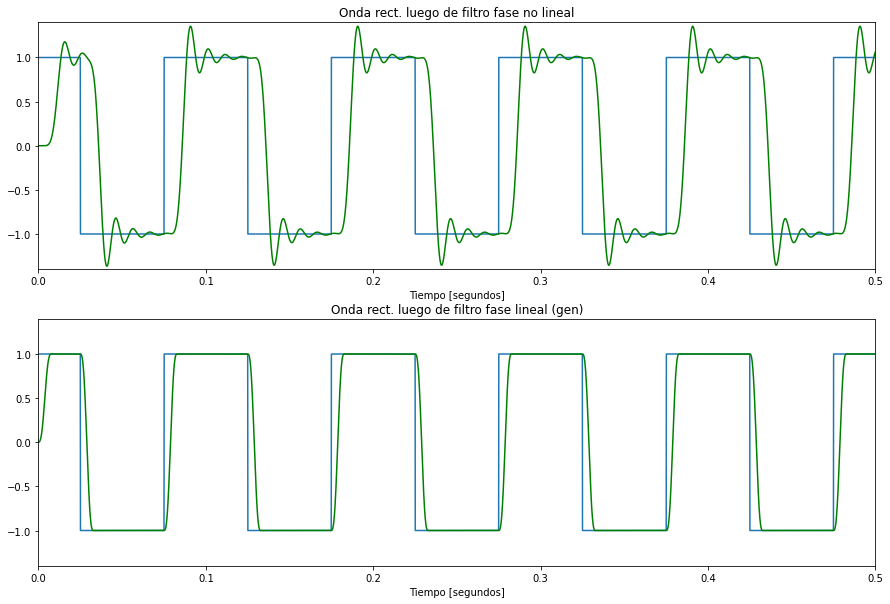

In [12]:
t = np.arange(-0,0.5,.0001)

x = np.sign(np.cos(2*np.pi*10*t))

sosFIR = signal.tf2sos(bFIR,aFIR)
yFIR = signal.sosfilt(sosFIR, x)

sos = signal.butter(10, 100, 'lowpass', fs=10000, output='sos')
#b,a = signal.butter(10, 100, 'lowpass', fs=10000)

y = signal.sosfilt(sos, x)

fig, axs = plt.subplots(2, figsize=(15,10))

axs[0].plot(t, x)
axs[0].plot(t, y,'g')
axs[0].set_title('Onda rect. luego de filtro fase no lineal')
axs[0].axis([0, 0.5, -1.4, 1.4])
axs[0].set_xlabel('Tiempo [segundos]')


axs[1].plot(t,x)
axs[1].plot(t,yFIR,'g')
axs[1].set_title('Onda rect. luego de filtro fase lineal (gen)')
axs[1].axis([0, 0.5, -1.4, 1.4])
axs[1].set_xlabel('Tiempo [segundos]')



/Users/julianoflaherty/Documents/Facultad/AudioDSP/.venv/lib/python3.8/site-packages/scipy/signal/_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


Text(0.5, 0, 'Tiempo [segundos]')

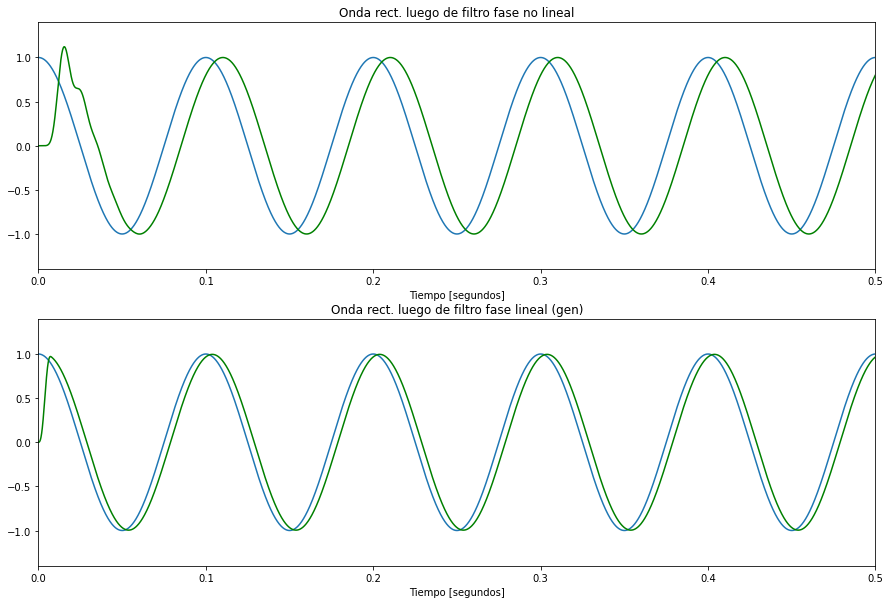

In [29]:
t = np.arange(-0,0.5,.0001)

x = np.cos(2*np.pi*10*t)

sosFIR = signal.tf2sos(bFIR,aFIR)
yFIR = signal.sosfilt(sosFIR, x)

sos = signal.butter(10, 100, 'lowpass', fs=10000, output='sos')
#b,a = signal.butter(10, 100, 'lowpass', fs=10000)

y = signal.sosfilt(sos, x)

fig, axs = plt.subplots(2, figsize=(15,10))

axs[0].plot(t, x)
axs[0].plot(t, y,'g')
axs[0].set_title('Onda rect. luego de filtro fase no lineal')
axs[0].axis([0, 0.5, -1.4, 1.4])
axs[0].set_xlabel('Tiempo [segundos]')


axs[1].plot(t,x)
axs[1].plot(t,yFIR,'g')
axs[1].set_title('Onda rect. luego de filtro fase lineal (gen)')
axs[1].axis([0, 0.5, -1.4, 1.4])
axs[1].set_xlabel('Tiempo [segundos]')



In [31]:
(t[np.argmax(yFIR)] - t[np.argmax(x)])

0.40390000000000004

In [57]:
# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

### Transformada Z y Transformada de Fourier

La respuesta en frecuencia se obtiene evaluando la función de transferencia en la circunferencia unidad,
$H(e^{j\theta}) = H(z)|_{z=e^{j\theta}}$

En el siguiente ejemplo se muestra uan gráfica tridimensional donde los dos ejes horizontales corresponde al plano complejo y el eje vertical corresponde al módulo de la Transferencia $H(z)$ de un filtro. En particular se grafica con una linea el valor de este módulo en la circunferencia unidad, que corresponde a la respuesta en frecuencia.

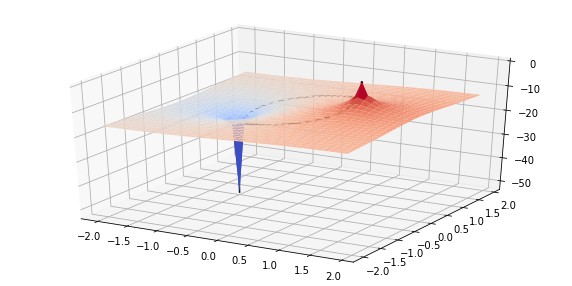

In [58]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Grilla para plotear en 3D
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)

# Diseño del filtro
b, a = signal.butter(3, 25, 'lowpass', fs=10000)

# polinomios del numerador y denominador para evaluar en z
pb = np.poly1d(b)
pa = np.poly1d(a)


# Z contiene el valor de cada complejo de la grilla creada
Z = np.zeros([len(X), len(X[0])], dtype=complex)
Z = X
Z = (1+0j)/(Z + Y * 1j)

# H es la transferencia evaluada en cada punto de la grilla
H = pb(Z)/pa(Z) 

# Se grafica la superficie
surf = ax.plot_surface(X, Y, np.log(abs(H)), rstride=1, cstride=1, cmap=cm.coolwarm,
           linewidth=0, antialiased=True)


# Se genera un arreglo de valorez zz en la cfa unidad
angle = np.arange(-np.pi, np.pi, 0.01)

xx = np.cos(angle)
yy = np.sin(angle)
zz_inv =  1/(1j*yy+xx)

# hh tiene el valor de Transformada de fourier en los puntos de la cfa zz
hh = np.log(abs(pb(zz_inv)/pa(zz_inv)))

#Se grafica
ax.plot(xx, yy, hh, '-k')


## Filtros selectores de bandas de frecuencia

El objetivo es permitir pasar inalterada cierta banda de frecuencias y
bloquear completamente el resto. 

Hay cuatro tipos básicos: pasa-bajos, pasa-altos, pasa-banda y suprime-banda.

Clasificación de las regiones de filtros selectores:
- Banda pasante: Rango de frecuencias que el filtro permite pasar sin alterar.
- Banda atenuada: Rango de frecuencias que el filtro bloquea.
- Banda de transición: Región entre la banda pasante y la bandaatenuada.
- Frecuencia de corte: Frecuencia entre la banda pasante y la banda de transición.


A continuación se muestran los cuatro tipos de filtro, se puede seleccionar el filtro asignando a $a$ y $b$ los coeficientes correspondientes.

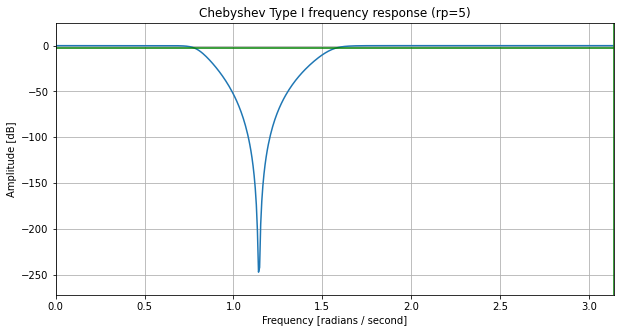

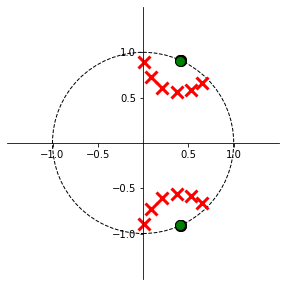

(array([0.4162995 +0.91336979j, 0.4162995 -0.91336979j,
        0.41248902+0.91357205j, 0.41248902-0.91357205j,
        0.41801434+0.90995908j, 0.41801434-0.90995908j,
        0.41042378+0.91038277j, 0.41042378-0.91038277j,
        0.41591737+0.90678666j, 0.41591737-0.90678666j,
        0.41213736+0.90700798j, 0.41213736-0.90700798j]),
 array([0.65114345+0.65829467j, 0.65114345-0.65829467j,
        0.01065259+0.89744098j, 0.01065259-0.89744098j,
        0.52621373+0.58850287j, 0.52621373-0.58850287j,
        0.08326198+0.72657406j, 0.08326198-0.72657406j,
        0.37590616+0.56128721j, 0.37590616-0.56128721j,
        0.21233652+0.60632926j, 0.21233652-0.60632926j]),
 1.055420360941694)

In [59]:
b1, a1 = signal.butter(4, 0.25, 'low')
b2, a2 = signal.butter(4, 0.25, 'highpass')
b3, a3 = signal.butter(6, [0.25,0.5], 'bandpass')
b4, a4 = signal.butter(6, [0.25,0.5], 'bandstop')

b=b4
a=a4

w, h = signal.freqz(b, a)

# grafica de la respuesta en frecuencia
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(3.14, color='green') # cutoff frequency
plt.axhline(-3, color='green') # rp
plt.show()


# Diagrama de polos y ceros
zplane(b,a)


## Filtros selectores de bandas de frecuencia

Parámetros que miden la calidad del filtro como selector de frecuencias.

### Roll-off
Es el ancho de la banda de transición. Un filtro de roll-off rápido significa que la banda de
transición es angosta. Para separar componentes
de frecuencia cercanos, el roll-off debe ser rápido.

### Ripple en la banda pasante
Amplitud de las oscilaciones en la banda pasante de la respuesta en magnitud. Para no alterar la magnitud de los componentes espectrales de la banda pasante, el filtro no debe tener ripple.
### Atenuación en la banda atenuada
Es deseable buena atenuación en la banda atenuada para eliminar los componentes espectrales en esa región.

## Ejemplo 1
A continuación se muestra como ejemplo el diseño de filtros de Chebyschev de Tipo I, en el que en el diseño se establece el ripple (el segundo parámetro) y se muestra cómo variando la cantidad de polos del filtro se tiene diferente roll-off. Cuando mayor el orden del polo, más selectivo puede ser el filtro teniendo menos roll off y cambiando claramente las características del ripple (más oscilaciones).

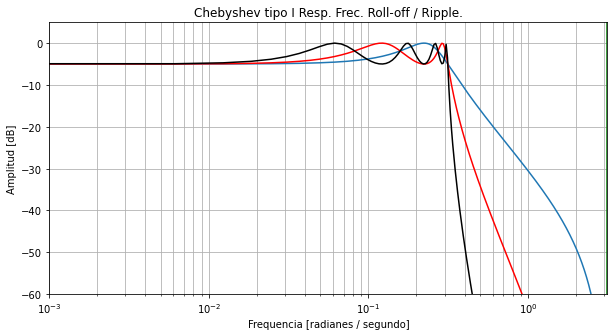

In [60]:
orden = 2
ripple = 5
f_corte = 0.1
b, a = signal.cheby1(orden,ripple,f_corte, 'low')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)))

orden = 4
b, a = signal.cheby1(orden,ripple, f_corte, 'low')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)),'r')

orden = 8
b, a = signal.cheby1(orden,ripple, f_corte, 'low')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)),'k')


plt.title('Chebyshev tipo I Resp. Frec. Roll-off / Ripple.')
plt.xlabel('Frequencia [radianes / segundo]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(3.14, color='green') # cutoff frequency
#plt.axhline(-3, color='green') # rp
plt.axis([0.001,np.pi,-60,5])
plt.show()


## Ejemplo 2

A continuación se muestra como ejemplo el diseño de filtros de Chebyschev de Tipo I, en el que en el diseño se cambia el ripple (el segundo parámetro) manteniendo el resto de los parámetros del filtro.

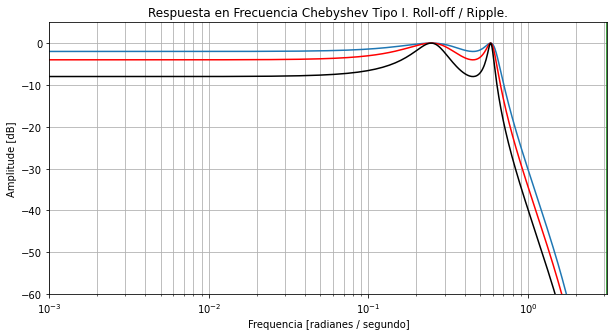

In [61]:
orden = 4
ripple = 2
f_corte = 0.2
b, a = signal.cheby1(orden,ripple,f_corte, 'low')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)))

ripple = 4
b, a = signal.cheby1(orden,ripple, f_corte, 'low')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)),'r')

ripple = 8
b, a = signal.cheby1(orden,ripple, f_corte, 'low')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)),'k')


plt.title('Respuesta en Frecuencia Chebyshev Tipo I. Roll-off / Ripple.')
plt.xlabel('Frequencia [radianes / segundo]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(3.14, color='green') # cutoff frequency
#plt.axhline(-3, color='green') # rp
plt.axis([0.001,np.pi,-60,5])
plt.show()

### Ejemplo 3

A continuación se muestra como ejemplo el diseño de filtros de Chebyschev de Tipo II, en el que muestra el diseño para tres atenuaciones diferentes de la banda suprimida.

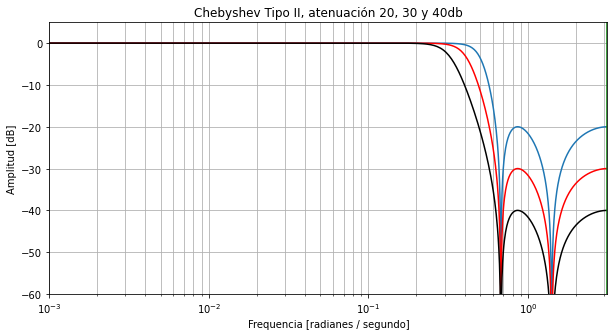

In [62]:
orden = 4
atten = 20
f_corte = 0.2
b, a = signal.cheby2(orden,atten,f_corte, 'low')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)))

atten = 30
b, a = signal.cheby2(orden,atten, f_corte, 'low')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)),'r')

atten = 40
b, a = signal.cheby2(orden,atten, f_corte, 'low')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)),'k')


plt.title('Chebyshev Tipo II, atenuación 20, 30 y 40db')
plt.xlabel('Frequencia [radianes / segundo]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(3.14, color='green') # cutoff frequency
#plt.axhline(-3, color='green') # rp
plt.axis([0.001,np.pi,-60,5])
plt.show()

### Ejemplo 4

Los filtros elípticos permiten establecer el ripple en la banda pasante así como el mínimo nivel de atenuación en la banda eliminada. De alguna manera combinan los dos parámetros de diseño que ofrecen los Filtros de Chebyschev Tipo I y tipo II. Dados esos parámetros y el orden queda determinado el ancho de la zona de transición entre ambas bandas.

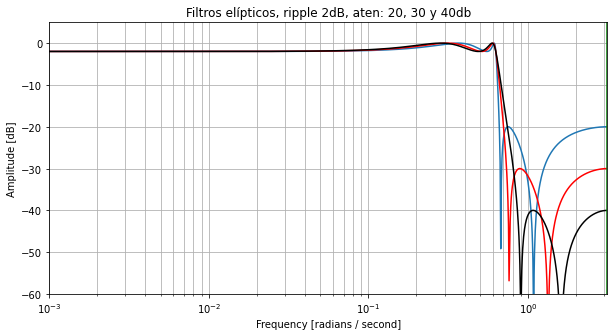

In [63]:
orden = 4
ripple = 2
atten = 20
f_corte = [0.2]
b, a = signal.ellip(orden,ripple,atten,f_corte, 'lowpass')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)))

atten = 30
b, a = signal.ellip(orden,ripple,atten,f_corte, 'lowpass')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)),'r')

atten = 40
b, a = signal.ellip(orden,ripple,atten,f_corte, 'lowpass')
w, h = signal.freqz(b, a)
plt.semilogx(w, 20*np.log10(abs(h)),'k')


plt.title('Filtros elípticos, ripple 2dB, aten: 20, 30 y 40db')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(3.14, color='green') # cutoff frequency
#plt.axhline(-3, color='green') # rp
plt.axis([0.001,np.pi,-60,5])
plt.show()

### Ejercicio:
- Compare un filtro de Chebyshev de tipo I, de tipo II, un Butterworth y uno Elíptico todos con la misma frecuencia de corte y orden.

## Filtro de media Móvil

A continuación se muestra un ejemplo de filtrado con un FIR clásico que es el filtrado de media Móvil.

### Ejercicio
- Cambiar la cantidad de muestras que se toma en el filtro a 4 y 8 muestras y comparar el resultado.


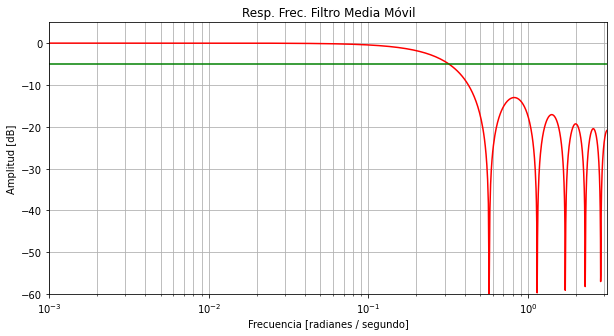

Text(0.5, 0, 'Tiempo [segundos]')

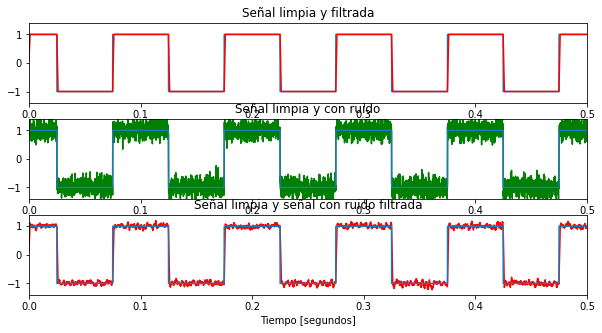

In [64]:
bMM = [1,1,1,1,1,1,1,1,1,1,1]
bMM = bMM/np.sum(bMM)
aMM = 1

wMM, hMM = signal.freqz(bMM, aMM)

plt.semilogx(wMM, 20 * np.log10(abs(hMM)),'r')
plt.title('Resp. Frec. Filtro Media Móvil')
plt.xlabel('Frecuencia [radianes / segundo]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.axis([0.001,np.pi,-60,5])
plt.show()



t = np.arange(-0,0.5,.0001)

x = np.sign(np.cos(2*np.pi*10*t))

xn = x+np.random.normal(0,0.2,len(x))


sosMM = signal.tf2sos(bMM,aMM)
yMM = signal.sosfilt(sosMM, x)
fig, axs = plt.subplots(3)

axs[0].plot(t, x)
axs[0].plot(t, yMM,'r')
axs[0].set_title('Señal limpia y filtrada')
axs[0].axis([0, 0.5, -1.4, 1.4])



ynMM = signal.sosfilt(sosMM, xn)
axs[1].plot(t,xn,'g')
axs[1].plot(t,x)
axs[1].set_title('Señal limpia y con ruido')
axs[1].axis([0, 0.5, -1.4, 1.4])


ynMM = signal.sosfilt(sosMM, xn)
axs[2].plot(t,ynMM,'r')
axs[2].plot(t,x)
axs[2].set_title('Señal limpia y señal con ruido filtrada')
axs[2].axis([0, 0.5, -1.4, 1.4])
axs[2].set_xlabel('Tiempo [segundos]')





## Diseño de sistemas en base al diagrama de polos y ceros.

A continuación se muestra cómo construir un sistema agregando polos y ceros.


Agregando un cero en -0.5 se atenuan las altas frecuenicas.
Agregando un polo en 0.5 se acentúan las bajas frecuencias.

### Ejercicio
- Cambie el polo a valor 0.9 y compare con el sistema original
- Agregue un polo en 0.9 y compare con el sistema original (notar que se puede plantear a mano los coeficientes del producto de polinomios o hacer la convolución de todos los monomios correspondientes a cada polo)

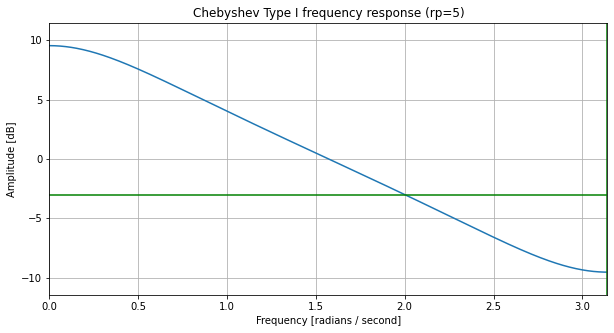

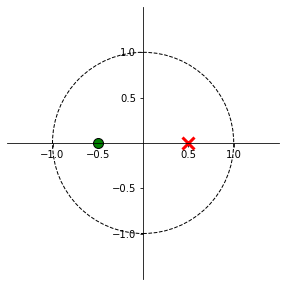

(array([-0.5]), array([0.5]), 1.0)

In [65]:
cero = -0.5
polo = 0.5

b=[1,-cero] 
a=[1,-polo]

# Sugerencia para poner 2 polos....
# a = [1,-polo-polo2,polo*polo2]

# Sugerencia para poner 2 polos....
# a = np.convolve([1,-p1],[1,-p2])


w, h = signal.freqz(b, a)

# grafica de la respuesta en frecuencia
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(3.14, color='green') # cutoff frequency
plt.axhline(-3, color='green') # rp
plt.show()


# Diagrama de polos y ceros
zplane(b,a)
